In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import welch, stft, butter, lfilter, sosfilt, savgol_filter
from scipy.optimize import curve_fit

import importlib
import glob
import sys
sys.path.append(r"C:\\Users\\yuhan\\nanospheres\\src\\")
from utils import load_charging_files, load_impulse_cal_files
from impulse_ana_utils import bandpass_filtered, lowpass_filtered
from plotting import plot_pulse_cal_data

In [2]:
import plotting
importlib.reload(plotting)
from plotting import plot_pulse_cal_data

In [9]:
color_cycle = ['#feb078', '#f1605d', '#b73779', '#721f81', '#2c115f', '#000004']

Not pulse calibration. Plot some overnight charging data here. Random process in the chamber add electrons every an hour or so. Single charge step is pretty clear when driven with 25 V peak to peak at 98 kHz. Charge during the calibration should be reliable.

['D:\\charging\\20240613_charge_monitor_overnight\\20240613_charge_monitor_overnight_1.mat', 'D:\\charging\\20240613_charge_monitor_overnight\\20240613_charge_monitor_overnight_2.mat']


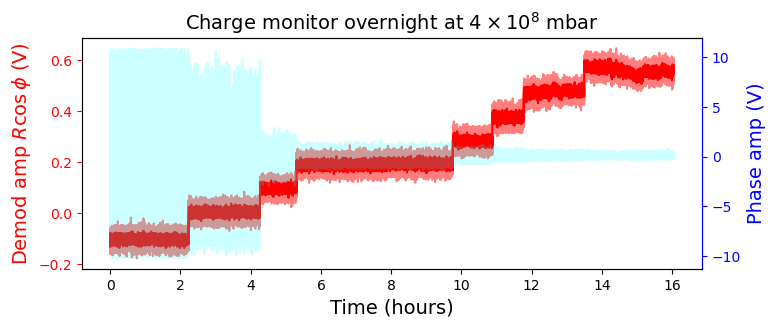

In [10]:
data_dir = r"D:\charging"
prefix = '20240613_charge_monitor_overnight'
file_list = glob.glob(f"{data_dir}\{prefix}\*.mat")

tt, aa, pp = load_charging_files(file_list)

fig, ax = plt.subplots(1, 1, figsize = (8, 3))

ax.plot(tt/3600, aa, 'r', alpha=0.5, markersize=2.5)
ax.plot(tt/3600, savgol_filter(aa, 1000, 1), 'r', markersize=0.3)
ax.set_xlabel('Time (hours)', fontsize=14)
ax.set_ylabel('Demod amp $R \cos \phi$ (V)', fontsize=14)
ax.set_title(r'Charge monitor overnight at $4 \times 10^8$ mbar', fontsize=14)

ax_twin = ax.twinx()
ax_twin.plot(tt/3600, pp, 'cyan', alpha=0.2)
ax_twin.set_ylabel('Phase amp (V)', fontsize=14)

ax.spines['left'].set_color('red')
ax.yaxis.label.set_color('red')
ax.tick_params(axis='y', colors='red')

ax_twin.spines['right'].set_color('blue')
ax_twin.yaxis.label.set_color('blue')
ax_twin.tick_params(axis='y', colors='blue')

In [4]:
data_dir = r"D:\charging"
prefix = '20240614_uvcharging_3e-8mbar'
file_list = glob.glob(f"{data_dir}\{prefix}\*\*.mat")

tt_c, aa, pp = load_charging_files(file_list)

KeyboardInterrupt: 

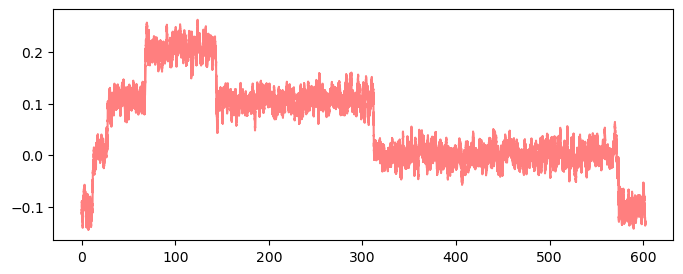

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (8, 3))

ax.plot(tt_c, aa, 'r', alpha=0.5, markersize=2.5)
ax.plot(tt_c, savgol_filter(aa, 1000, 1), 'r', markersize=0.3)
ax.set_xlabel('Time (s)', fontsize=14)
ax.set_ylabel('Demod amp $R \cos \phi$ (V)', fontsize=14)
ax.set_title(r'Filament and UV charging at $3 \times 10^8$ mbar', fontsize=14)

ax_twin = ax.twinx()
ax_twin.plot(tt, pp, 'cyan', alpha=0.2)
ax_twin.set_ylabel('Phase amp (V)', fontsize=14)

ax.spines['left'].set_color('red')
ax.yaxis.label.set_color('red')
ax.tick_params(axis='y', colors='red')

ax_twin.spines['right'].set_color('blue')
ax_twin.yaxis.label.set_color('blue')
ax_twin.tick_params(axis='y', colors='blue')

In [12]:
data_dir = r"D:\pulse\20240613_plus_one_e_data"
prefix = '20240613_190v_3_4e-8mbar'
file_list = glob.glob(f"{data_dir}\{prefix}\*\*")

tt, xx, yy, zz, vv = load_impulse_cal_files(file_list[0:2])

In [25]:
fs = int(int(1 / (tt[1] - tt[0])))
bp = bandpass_filtered(zz, fs, 63000, 66000, order=8)
lp_bp = lowpass_filtered(bp, fs, 30, order=8)

(<Figure size 1000x800 with 10 Axes>,
 array([<Axes: title={'center': '34 MeV Pulses at $3.4 \\times 10^{-8}$ mbar'}>,
        <Axes: >, <Axes: ylabel='z signal (V)'>, <Axes: >,
        <Axes: xlabel='Time (s)'>], dtype=object))

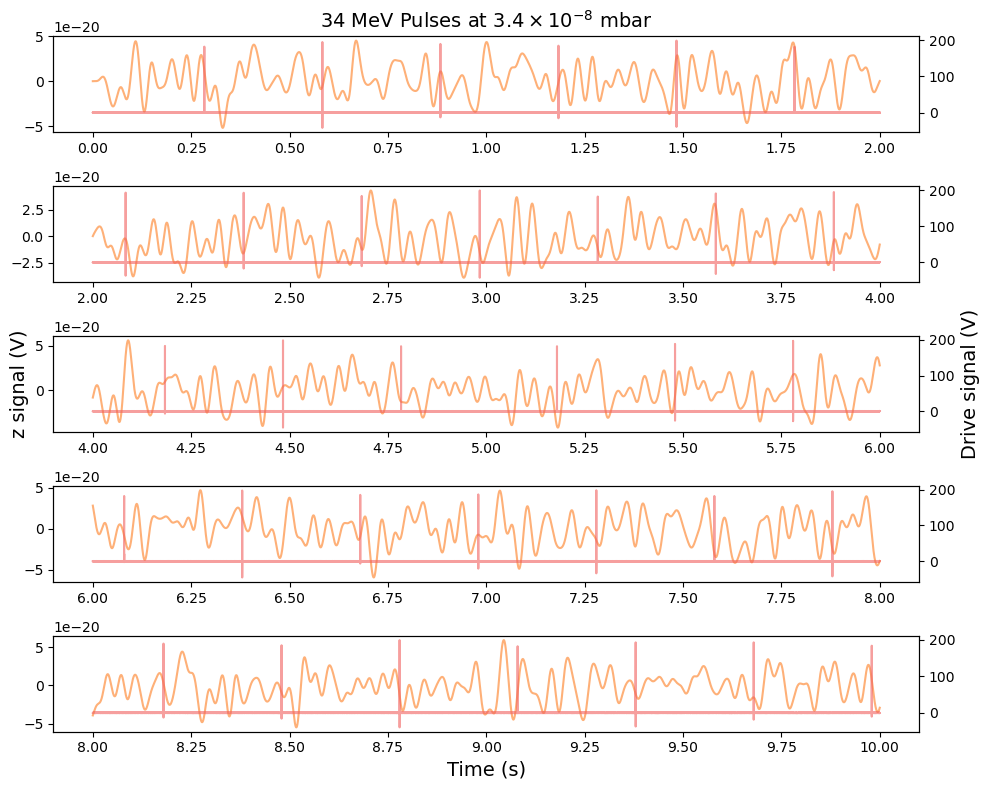

In [14]:
plot_pulse_cal_data(tt, lp_bp, vv, xlabel='Time (s)', ylabel='z signal (V)',
                    ylabel_twin='Drive signal (V)', title=r'34 MeV Pulses at $3.4 \times 10^{-8}$ mbar')

#### Make a plot for the GIRA report...

In [18]:
pulse_idx = np.logical_and(tt>8.45, tt<8.76)

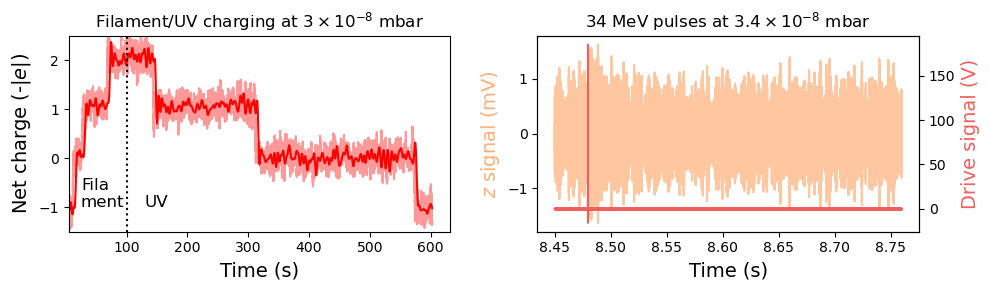

In [32]:
fig, axes = plt.subplots(1, 2, figsize = (10, 3))

fs_c = int(int(1 / (tt_c[1] - tt_c[0])))
lp_c = lowpass_filtered(aa, fs_c, 0.2, order=8)

axes[0].plot(tt_c, aa/0.1, 'r', alpha=0.4, markersize=2.5)
axes[0].plot(tt_c, lp_c/0.1, 'r', alpha=1, markersize=2.5)
axes[0].set_xlim(5)
axes[0].set_ylim(-1.5, 2.5)
axes[0].set_yticks([-1, 0, 1, 2])

axes[0].set_xlabel('Time (s)', fontsize=14)
axes[0].set_ylabel(r'Net charge (-$|e|$)', fontsize=14)
axes[0].set_title(r'Filament/UV charging at $3 \times 10^{-8}$ mbar')

axes[0].vlines(100, -1.5, 2.5, color='k', linestyles=':')
axes[0].text(25, -1, 'Fila\nment', fontsize=12)
axes[0].text(130, -1, 'UV', fontsize=12)

ax_twin = axes[1].twinx()
axes[1].plot(tt[pulse_idx], bp[pulse_idx]*1000, color=color_cycle[0], alpha=0.7)
ax_twin.plot(tt[pulse_idx], vv[pulse_idx]*20, color=color_cycle[1])
axes[1].set_xlabel('Time (s)', fontsize=14)
axes[1].set_ylabel('$z$ signal (mV)', color=color_cycle[0], fontsize=14)
ax_twin.set_ylabel('Drive signal (V)', color=color_cycle[1], fontsize=14)
axes[1].set_title(r'34 MeV pulses at $3.4 \times 10^{-8}$ mbar')

fig.tight_layout()